# Deep Learning Project Report: Sleep Health and Lifestyle Analysis and Study

# Abstract

Sleep disorder problem is a big problem in the United States, which affects millions of people here. The sleep disorder usually involves the problem with sleeping quality, quantity and sleep duration time. Thus, sleep health and lifestyle really matter to everyone’s life currently. This project focuses on using the deep learning learnt from this course, particularly with Keras and TensorFlow APIs, to analyze the residents’ sleep quality and lifestyle, and from there to give some insights and tips on the residents’ sleep habits and possible effects on the people’s lifestyle. More specifically, from this project, we also want to give some insights about current people's sleep quality, as well as some suggestions and recommendations for the current generation’s sleeping style. This project can be a good reference for researchers, health related professions and the public caring about public health and sleep quality.

# Problem Statement

With the provided prevalence and impact of sleep disorders, I am going to explore the relationships that exist between individuals’ health metrics, lifestyle characteristics, and sleep disorder status. In particular, I am interested in whether these relationships could be used to predict an individual's risk of developing a sleep disorder, for preventative and diagnostic purposes with the technology learnt from this deep learning course including but not limited to Keras and TensorFlow APIs.

I am going to explore these relationships using a dataset containing health metrics (age, heart rate, BMI category, etc.), lifestyle factors (physical activity level, stress level, occupation, etc.) and sleep disorder status (None, Insomnia, and Sleep Apnea). This dataset is retrieved from the kaggle.com

The questions can be more specific such as can I use this health and lifestyle features from my dataset to predict whether someone has a sleep disorder. Or can I accurately predict whether someone has a sleep disorder? If so, can it differentiate between sleep apnea and insomnia. Besides, I can also ask questions like which sleep health and lifestyle factors are most correlated with sleep disorder status? How do these correlations change for sleep apnea vs. insomnia? And what are the causal relationships between sleep disorder status and health metrics and lifestyle factors, and how do these factors influence these relationships (while accounting for potential confounding variables)? All the above and relevant questions can be asked for this project.


# Data Description

## Data Outline

The dataset includes various health and lifestyle factors for all surveyed individuals, including the following variables:

●	 Person ID: A unique identifier for everyone.

●	 Age: The age of the person in years.

●	 Gender: Information on the gender of the individual.

●	 Occupation: The individual’s occupation.

●	 Sleep Duration: Hours of sleep per night.

●	 Quality of Sleep: A subjective rating of sleep quality on a scale of 1 to 10.

●	 Physical Activity Level: The number of minutes of physical activity per day.

●	 Stress Level: A stress rating on a scale of 1 to 10.

●	 BMI Category: A classification of body mass index (BMI) into underweight, normal, or overweight.

●	 Blood Pressure: Measured in systolic/diastolic units.

●	 Heart Rate: The individual’s resting heart rate in beats per minute (bpm).

●	 Daily Steps: The number of steps taken per day.

●	 Sleep Disorder: Categorized as none, insomnia, or sleep apnea.

In [1]:
import pandas as pd

In [2]:
# csv to dataframe
df = pd.read_csv("Sleep_health_and_lifestyle_dataset.csv")
df2 = df
# head of dataframe
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


From the above printed data frame, I can see that particularly in the last column ‘sleep disorder’, it has many empty Nan contents there, this means the person does not have either insomnia or sleep apnea.

The following is for the attributes of all categories’ information; Let us see how much diversity for each of the categories:

In [3]:
unique_occupations = df['Occupation'].unique()
print(f"Unique occupations: {unique_occupations}" )

unique_BMI = df['BMI Category'].unique()
print(f"Unique BMI: {unique_BMI}" )

unique_SleepDisorder = df['Sleep Disorder'].unique()
print(f"Unique Sleep Disorder: {unique_SleepDisorder}" )

Unique occupations: ['Software Engineer' 'Doctor' 'Sales Representative' 'Teacher' 'Nurse'
 'Engineer' 'Accountant' 'Scientist' 'Lawyer' 'Salesperson' 'Manager']
Unique BMI: ['Overweight' 'Normal' 'Obese' 'Normal Weight']
Unique Sleep Disorder: ['None' 'Sleep Apnea' 'Insomnia']


As the category classification, we can see that: per occupation, there are a total of eleven types ranging from teacher to software engineer. This kind of covers most of the common occupations in our society. And the original datasets already provided the BMI with normal, overweight, normal weight and obese. And the sleep disorder types have the None which stands for no sleep order, besides the sleep apnea and insomnia.

## Gender

In [4]:
import matplotlib.pyplot as plt

Let’s first look at the gender ratio. Per the gender ratio, male and female are having a similar ratio in the datasets with 189 males and 185 females, that is saying the ratio per gender is balanced in the collected survey data. This shows there will not be likely to be a biased analysis per the gender side.

Value counts:
Male      189
Female    185
Name: Gender, dtype: int64


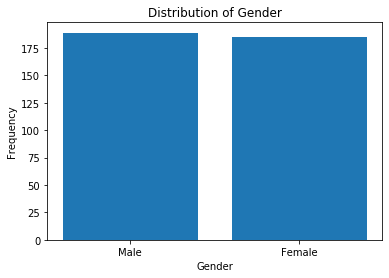

In [5]:
column = 'Gender'
unique_values = df[column].unique()
unique_counts = df[column].value_counts()

print("Value counts:")
print(unique_counts)

plt.figure()
plt.bar(unique_values, df[column].value_counts())
plt.title(f"Distribution of {column}")
plt.xlabel(column)
plt.ylabel("Frequency")
plt.show()

## Age

The range of age values is: 27-59
The mean of age values is: 42.18449197860963


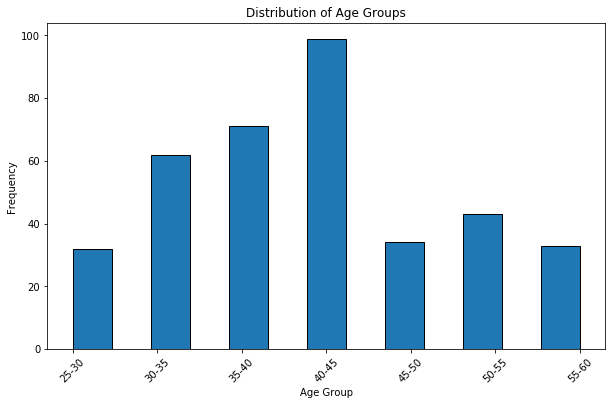

In [6]:
print(f"The range of age values is: {df['Age'].min()}-{df['Age'].max()}")
print(f"The mean of age values is: {df['Age'].mean()}")

# bins for age groups
bins = range(15, 81, 5)  
labels = [f"{i}-{i+5}" for i in bins[:-1]]

# Bin the 'Age' column
df['Age_Group'] = pd.cut(df['Age'], bins=bins, labels=labels, include_lowest=True)

# histogram of the Age groups
plt.figure(figsize=(10, 6))
plt.hist(df['Age_Group'], bins=len(labels), edgecolor='black')
plt.xlabel('Age Group')
plt.ylabel('Frequency')
plt.title('Distribution of Age Groups')
plt.xticks(rotation=45)
plt.show()

## Occupation

In the plotted occupation bar chart, we can see the nurse, doctor and engineer are the top 3 occupations in these datasets, but managers, sales representative and scientists are the least three occupations for this survey. We can guess that scientists are the least representative in society as not many scientific positions. But for managers as we know there are many occupations about managers in the job markets. I guess these data are not widely covering all the occupation types, and this may lead to biased results of this analysis report, but this report can also be a representative one per the sleep quality and the public health conditions.

Value counts:
Nurse                   73
Doctor                  71
Engineer                63
Lawyer                  47
Teacher                 40
Accountant              37
Salesperson             32
Software Engineer        4
Scientist                4
Sales Representative     2
Manager                  1
Name: Occupation, dtype: int64


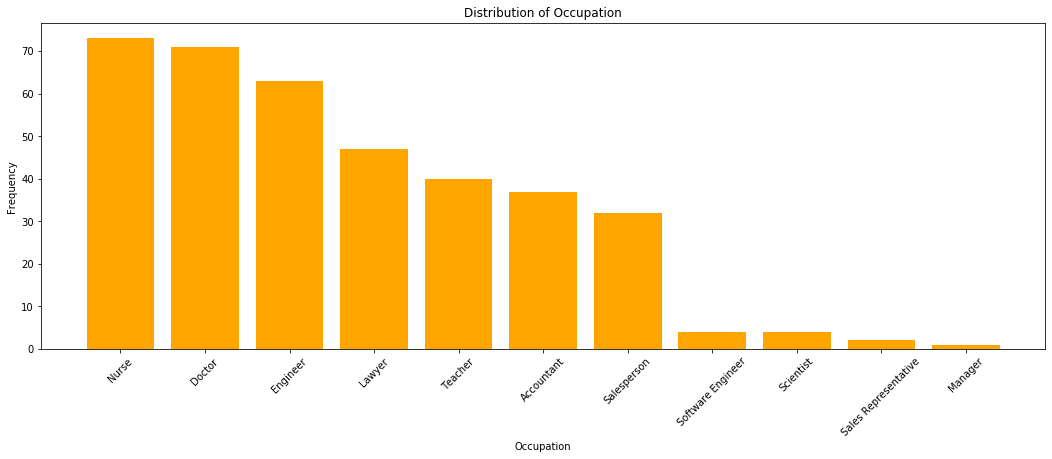

In [7]:
column = 'Occupation'
unique_counts = df[column].value_counts()

print("Value counts:")
print(unique_counts)

plt.figure(figsize=(18,6))
plt.bar(unique_counts.index, unique_counts.values,color='orange')
plt.title(f"Distribution of {column}")
plt.xlabel(column)
plt.ylabel("Frequency")
plt.xticks(rotation=45)  # Rotate labels as they are too long
plt.show()

## Sleep Quality

In [8]:
import numpy as np

From the plot, the overall sleep quality is good, the majority have good ratings here. Although the surveyed data did not offer a specific definition of what range represents good sleep quality. However, we can see from the histogram that it is left skewed so we can see the majority is beyond the average sleep rating. Thus, we can conclude most of the sleep quality is good with ratings beyond 6. From the data we can see generally speaking, the residents get good sleep quality within this survey scope.

The range of sleep quality values is: 4-9


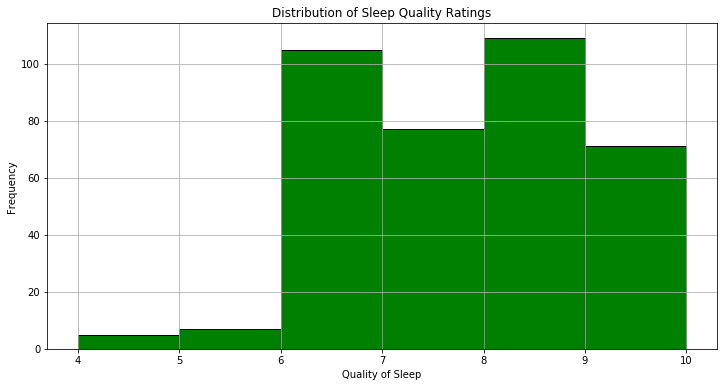

In [9]:
# Display range of sleep quality values
print(f"The range of sleep quality values is: {df['Quality of Sleep'].min()}-{df['Quality of Sleep'].max()}")

# Define bins in increments of 1 for sleep quality
bins = np.arange(df['Quality of Sleep'].min(), df['Quality of Sleep'].max() + 2, 1)

# Plot histogram directly on 'Sleep Quality' column
plt.figure(figsize=(12, 6))
plt.hist(df['Quality of Sleep'], bins=bins, edgecolor='black', color='green')
plt.xlabel('Quality of Sleep')
plt.ylabel('Frequency')
plt.title('Distribution of Sleep Quality Ratings')
plt.xticks(bins)  
plt.grid()
plt.show()

# Sleep Disorder Classification

In the below, I first approach this as a classification problem, that is predicting Sleep Disorder and regression problem (e.g., predicting Quality of Sleep or Sleep Duration). Below are the deep learning analyses I performed:

Per the input, I use all numeric and encoded categorical features. Per the output, it should output the multiclass classification, that is None, Sleep Apnea, or Insomnia. The model I used is Feedforward Neural Network using keras.Sequential package.

And per the parameters chose, I choose 20 percent as the testing dataset, and the rest 80 percent as the training dataset. The echos I chose 49 here.

In [10]:
# Sleep Disorder Classification Using Keras

# Libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report

# Dataset
df = pd.read_csv("Sleep_health_and_lifestyle_dataset.csv") 

# Preprocess Blood Pressure
df[['Systolic', 'Diastolic']] = df['Blood Pressure'].str.split('/', expand=True).astype(float)
df.drop(columns=['Person ID', 'Blood Pressure'], inplace=True)

# Encode Target
X = df.drop(columns=['Sleep Disorder'])
y = df['Sleep Disorder']

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
y_onehot = to_categorical(y_encoded)

# Column Categories
categorical_features = ['Gender', 'Occupation', 'BMI Category']
numerical_features = X.drop(columns=categorical_features).columns.tolist()

# Preprocessing Pipeline
preprocessor = ColumnTransformer(transformers=[
    ('num', StandardScaler(), numerical_features),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
])

X_processed = preprocessor.fit_transform(X)

# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X_processed, y_onehot, test_size=0.2, random_state=123)

# Build Neural Network Model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(y_onehot.shape[1], activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the Model
history = model.fit(X_train, y_train, epochs=49, batch_size=16, validation_split=0.2, verbose=1)

# Evaluate the Model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.4f}")

# Classification Report
y_pred = model.predict(X_test)
y_pred_labels = np.argmax(y_pred, axis=1)
y_test_labels = np.argmax(y_test, axis=1)

print("\n Classification Report:")
print(classification_report(y_test_labels, y_pred_labels, target_names=label_encoder.classes_))

Epoch 1/49
15/15 [==============================] - 1s 14ms/step - loss: 1.0682 - accuracy: 0.4686 - val_loss: 0.8901 - val_accuracy: 0.7000
Epoch 2/49
15/15 [==============================] - 0s 3ms/step - loss: 0.7735 - accuracy: 0.8577 - val_loss: 0.6721 - val_accuracy: 0.9000
Epoch 3/49
15/15 [==============================] - 0s 3ms/step - loss: 0.5886 - accuracy: 0.8996 - val_loss: 0.5224 - val_accuracy: 0.9000
Epoch 4/49
15/15 [==============================] - 0s 3ms/step - loss: 0.4610 - accuracy: 0.8996 - val_loss: 0.4288 - val_accuracy: 0.9000
Epoch 5/49
15/15 [==============================] - 0s 3ms/step - loss: 0.3875 - accuracy: 0.8996 - val_loss: 0.3852 - val_accuracy: 0.9000
Epoch 6/49
15/15 [==============================] - 0s 3ms/step - loss: 0.3531 - accuracy: 0.9121 - val_loss: 0.3663 - val_accuracy: 0.9000
Epoch 7/49
15/15 [==============================] - 0s 3ms/step - loss: 0.3295 - accuracy: 0.9163 - val_loss: 0.3642 - val_accuracy: 0.8833
Epoch 8/49
15/15 [=

The classification report below summarizes the performance of a deep learning classifier using Keras that predicts sleep disorders as the table above.

And we can tell, per Insomnia, it is very strong performance with high recall 0.94 and good precision 0.89, meaning that this model identifies most Insomnia cases and makes few false alarms.

As for the no disorder one, the highest precision is 0.98, but lower recall is 0.89, saying that it is excellent at confirming non-disorder but misses some real "none" cases.

As for the sleep apnea: the lower precision 0.75 indicates more false positives, but strong recall 0.92 shows the model catches most actual cases.

And let’s look at the overall model metrics. The accuracy of 91% of total predictions is correct. The macro average with simple average of all F1-scores. It treats all classes equally, which is good for imbalance analysis. Per the weighted average: the weighted average of F1-scores, considering how many instances each class has, sounds fairer when classes are imbalanced.

All above, this model performs very well overall with an accuracy of 91%. It performs best on the "None" class (which also has the most data), and reasonably well on "Insomnia". The "Sleep Apnea" has the lowest precision, that suggests some confusion with other classes, but it is still well-handled with high recall. The macro average F1-score of 0.89 indicates balanced performance across classes, despite different sample sizes.

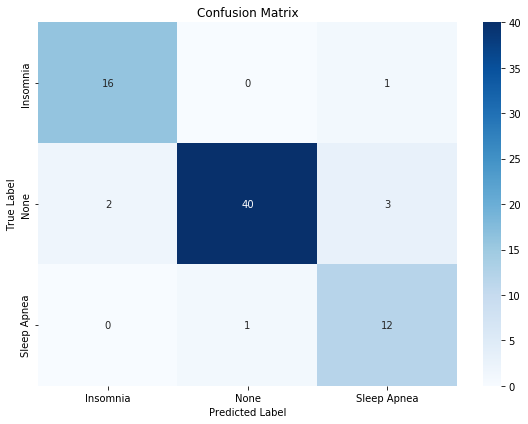

In [11]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Confusion Matrix Visualization
cm = confusion_matrix(y_test_labels, y_pred_labels)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.show()

# Sleep Quality Prediction using Keras by Regression

Per the following I will do the sleep quality prediction: which is using the Lifestyle features such as Stress Level, Physical Activity as the input, and the output as the predict quality of sleep. So this is totally a regression problem.

Epoch 1/49
15/15 [==============================] - 1s 9ms/step - loss: 49.4824 - mae: 6.9278 - val_loss: 47.1460 - val_mae: 6.7743
Epoch 2/49
15/15 [==============================] - 0s 3ms/step - loss: 38.6473 - mae: 6.0993 - val_loss: 35.1974 - val_mae: 5.8256
Epoch 3/49
15/15 [==============================] - 0s 3ms/step - loss: 26.0173 - mae: 4.9471 - val_loss: 21.2023 - val_mae: 4.4416
Epoch 4/49
15/15 [==============================] - 0s 3ms/step - loss: 13.0421 - mae: 3.3638 - val_loss: 8.5174 - val_mae: 2.5833
Epoch 5/49
15/15 [==============================] - 0s 3ms/step - loss: 4.2492 - mae: 1.7661 - val_loss: 2.2758 - val_mae: 1.3542
Epoch 6/49
15/15 [==============================] - 0s 3ms/step - loss: 1.6355 - mae: 0.9989 - val_loss: 1.2243 - val_mae: 0.8445
Epoch 7/49
15/15 [==============================] - 0s 3ms/step - loss: 1.1403 - mae: 0.7856 - val_loss: 0.8010 - val_mae: 0.6839
Epoch 8/49
15/15 [==============================] - 0s 3ms/step - loss: 0.7337 - ma

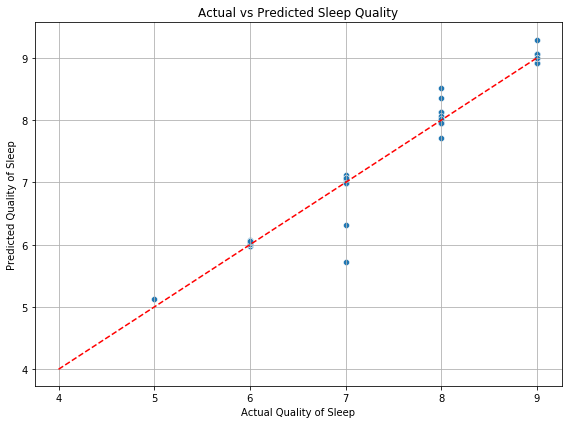

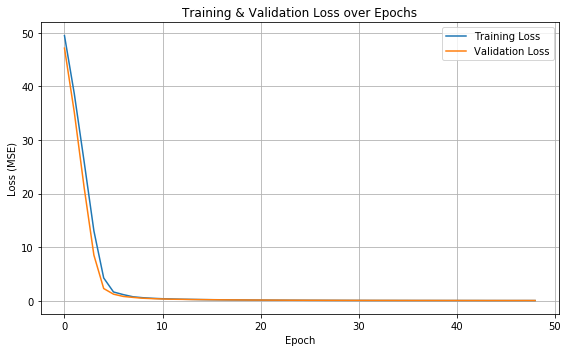

In [13]:
# Sleep Quality Prediction using Keras by Regression

# Libraries
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Define Input and Target
# Target: Quality of Sleep by regression
y = df['Quality of Sleep']

# Select lifestyle-related features as input
features = [
    'Sleep Duration',
    'Physical Activity Level',
    'Stress Level',
    'Heart Rate',
    'Daily Steps',
    'BMI Category',
    'Gender',
    'Occupation'
]
X = df[features]

# Define Preprocessing
categorical_features = ['BMI Category', 'Gender', 'Occupation']
numerical_features = [col for col in X.columns if col not in categorical_features]

preprocessor = ColumnTransformer(transformers=[
    ('num', StandardScaler(), numerical_features),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
])

X_processed = preprocessor.fit_transform(X)

# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=123)

# Build Regression Model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1)  # Output layer for regression (1 value)
])

model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Train the Model
history = model.fit(X_train, y_train, epochs=49, batch_size=16, validation_split=0.2, verbose=1)

# Evaluate Model
y_pred = model.predict(X_test).flatten()

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"\n Evaluation Metrics:")
print(f"Mean Squared Error (MSE): {mse:.3f}")
print(f"Mean Absolute Error (MAE): {mae:.3f}")
print(f"R-squared (R²): {r2:.3f}")

# Visualization for True vs Predicted
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel("Actual Quality of Sleep")
plt.ylabel("Predicted Quality of Sleep")
plt.title("Actual vs Predicted Sleep Quality")
plt.grid(True)
plt.tight_layout()
plt.show()

# Visualization: Training Loss
plt.figure(figsize=(8, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training & Validation Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

The MSE is 0.038, which shows the squaring penalizes larger errors more heavily. MSE here also states, on average, the model's predictions are very close to the true values. 

MAE of 0.083 means that on average, the predictions are off by just 0.08 points on the 1–10 sleep quality scale, which shows the final result is excellent.

And finally, the R² of 0.970 says that 97% of the variability in sleep quality is explained by the model. This also suggests an exceptionally strong model fit.

Then from the plotted Actual vs. Predicted Sleep Quality figure, we can see that:

The points near the red line, which show these predictions are very accurate. And most of the predictions fall very close to the red line, which means the model is doing an excellent job.

Per the vertical distance from the line. The vertical gap between a point and the red line is the prediction error for that sample. In this plot, errors are small, indicating high precision.

By the trends by value. The model predicts well across the full range from 4 to 9. And there's no obvious bias, like consistently under or overestimating.

And in the next training & validation loss voer epochs figure, we can also tell that:

Per the steep initial drop, which is Epochs from 0 to 10. Both training and validation loss drop sharply in the first few epochs. This shows the model is learning quickly from the data early on. And MSE drops from around 50 to below 1, indicating significant improvement.

Then, when jump step into the flattening after Epoch 10. After about 10 epochs, both curves flatten, indicating the model is converging. Loss stabilizes around 0.03 to 0.04, which matches the earlier reported MSE. 

In this epoch figure, there is no overfitting detected. Validation loss follows training loss very closely, with no significant gap between the two. This means the model generalizes well. It performs consistently on both training and unseen validation data.

So, we can indicate that our model got trained efficiently, generalized well and does not overfit. This also shows the model achieves excellent performance.